#### The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.
#### Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.
#### he following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer.If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

#### Loading dataset

In [2]:
df = pd.read_csv("happiness_score_dataset.csv")
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Checking for null values

In [3]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

#### The dataset have no null values

In [4]:
df.shape

(158, 12)

#### Our dataset have 158 rows and 11 columns

In [5]:
#To get the details of all rows
pd.set_option('display.max_rows',None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### Checking the count of each region

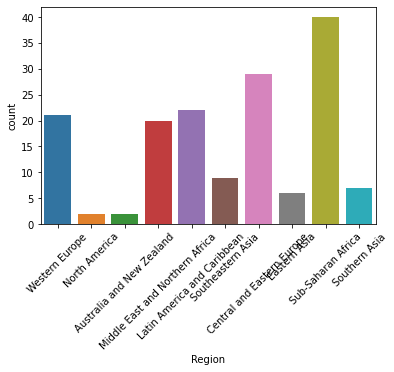

In [7]:
sns.countplot(df['Region'])
plt.xticks(rotation=45)
plt.show()

#### From the graph its clear that Sub-Saharan-African countries have the maximum count.

#### Converting categorical values to numerical

In [8]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for column in df:
    df[column] = label_enc.fit_transform(df[column])
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,0,156,19,151,154,148,156,150,115,125
1,58,9,1,155,100,136,157,150,143,98,144,134
2,37,9,2,154,16,139,155,128,151,153,129,122
3,105,9,3,153,50,153,152,132,157,143,132,118
4,24,5,4,152,26,140,151,140,145,141,145,116


#### Setting Country as Index

In [9]:
df = df.set_index('Country')
df.head(2)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
135,9,0,156,19,151,154,148,156,150,115,125
58,9,1,155,100,136,157,150,143,98,144,134


#### Lets check the correlation

In [10]:
df.corr()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,0.213092,-0.213092,-0.075608,-0.202232,-0.130799,-0.252783,0.109638,0.210766,0.311754,-0.049227
Happiness Rank,0.213092,1.000000,-1.000000,0.215899,-0.795699,-0.770159,-0.757635,-0.576458,-0.301363,-0.172684,-0.532728
Happiness Score,-0.213092,-1.000000,1.000000,-0.215899,0.795699,0.770159,0.757635,0.576458,0.301363,0.172684,0.532728
Standard Error,-0.075608,0.215899,-0.215899,1.000000,-0.221022,-0.213507,-0.292562,-0.186546,-0.145559,-0.113162,-0.021932
Economy (GDP per Capita),-0.202232,-0.795699,0.795699,-0.221022,1.000000,0.681042,0.847213,0.415421,0.226086,0.012482,0.077430
Family,-0.130799,-0.770159,0.770159,-0.213507,0.681042,1.000000,0.585628,0.528139,0.183678,0.146399,0.190534
Health (Life Expectancy),-0.252783,-0.757635,0.757635,-0.292562,0.847213,0.585628,1.000000,0.399887,0.166859,0.110054,0.078649
Freedom,0.109638,-0.576458,0.576458,-0.186546,0.415421,0.528139,0.399887,1.000000,0.462596,0.418458,0.095441
Trust (Government Corruption),0.210766,-0.301363,0.301363,-0.145559,0.226086,0.183678,0.166859,0.462596,1.000000,0.212320,0.054891
Generosity,0.311754,-0.172684,0.172684,-0.113162,0.012482,0.146399,0.110054,0.418458,0.212320,1.000000,0.008091


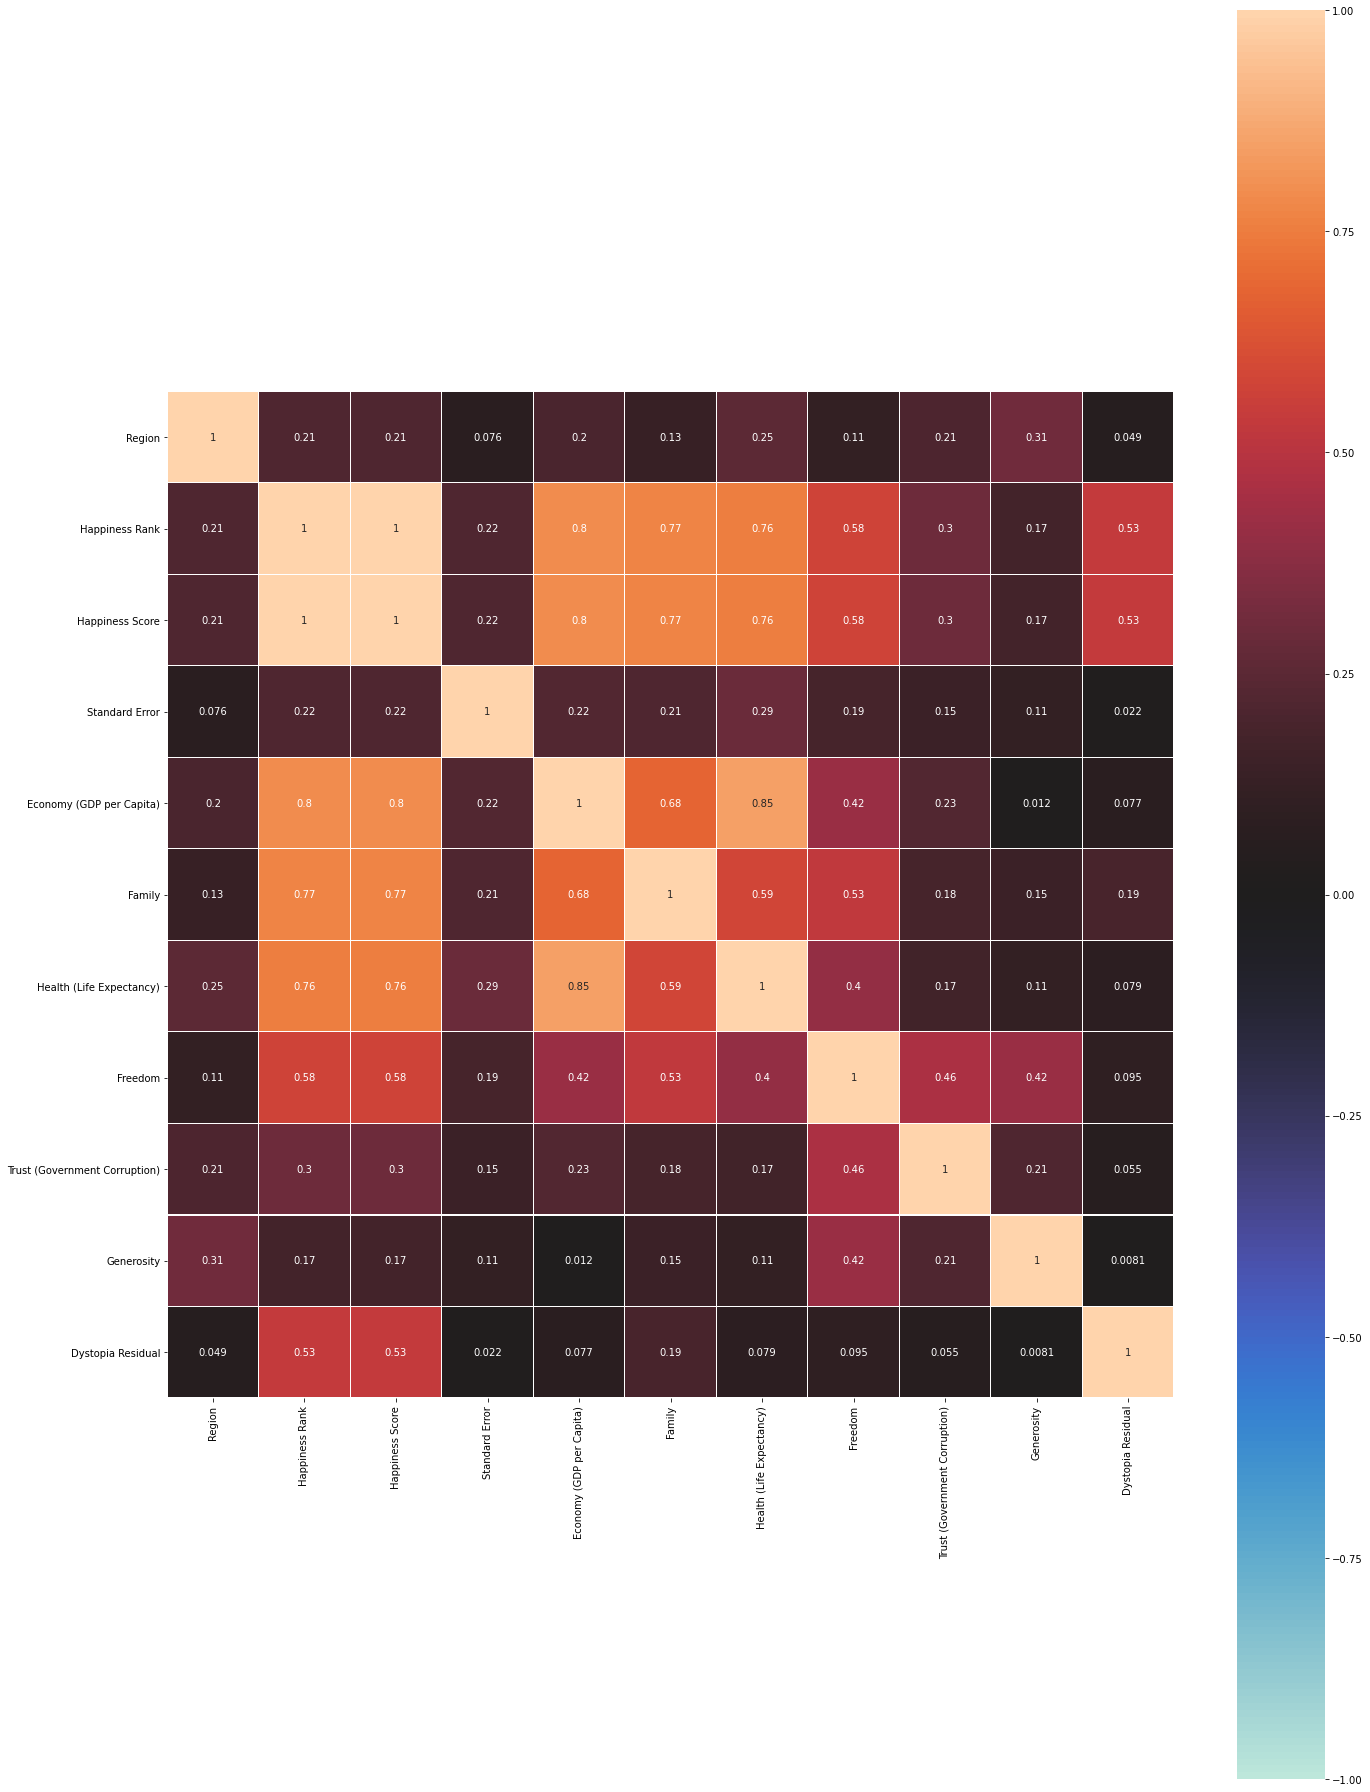

In [11]:
df_corr = df.corr().abs()
plt.figure(figsize=(20,25))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square = True,center=0,fmt='.2g',linewidth=.2)
plt.tight_layout()

#### Happiness score is highly correlated with Economy followed by Family and health. Its least correlated with Standard error and generosity

#### Lets check the Relation of features with target variable

<AxesSubplot:xlabel='Happiness Rank', ylabel='Happiness Score'>

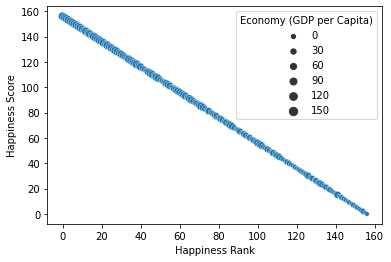

In [12]:
sns.scatterplot(x='Happiness Rank',y='Happiness Score',size = df['Economy (GDP per Capita)'],data=df)

#### As Happiness Rank increases Happiness score decreases

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

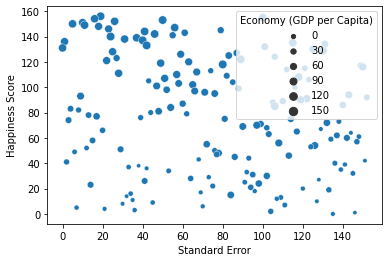

In [13]:
sns.scatterplot(x='Standard Error',y='Happiness Score',size = df['Economy (GDP per Capita)'],data=df)

#### The relation betweeen standard error and happiness score is not linear

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

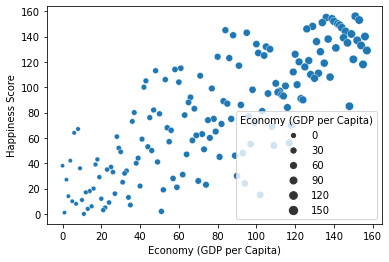

In [14]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',size = df['Economy (GDP per Capita)'],data=df)

#### The relation between Economy and Happiness Score is linear

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

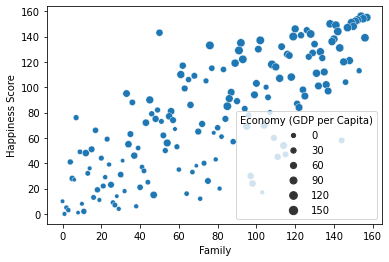

In [15]:
sns.scatterplot(x='Family',y='Happiness Score',size = df['Economy (GDP per Capita)'],data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

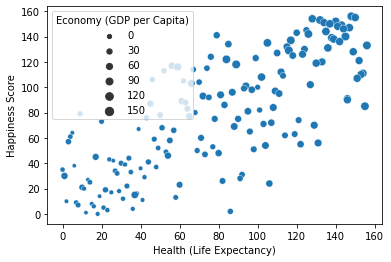

In [16]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',size = df['Economy (GDP per Capita)'],data=df)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

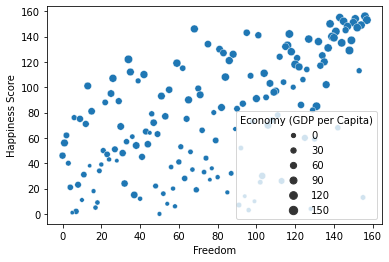

In [17]:
sns.scatterplot(x='Freedom',y='Happiness Score',size = df['Economy (GDP per Capita)'],data=df)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

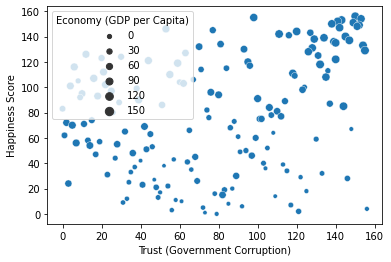

In [18]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',size = df['Economy (GDP per Capita)'],data=df)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

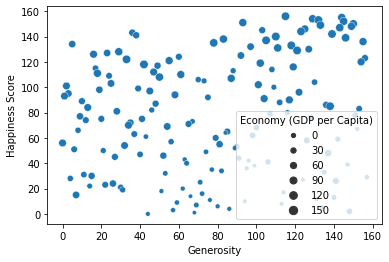

In [19]:
sns.scatterplot(x='Generosity',y='Happiness Score',size = df['Economy (GDP per Capita)'],data=df)

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

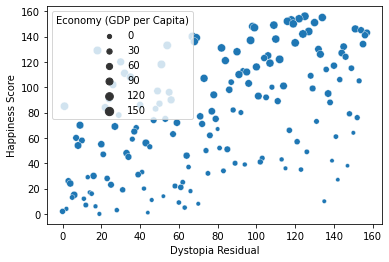

In [20]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',size = df['Economy (GDP per Capita)'],data=df)

##### We have seen the relationship between all features and target variable Economy,family, health shows a linear relationship with the target variable

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

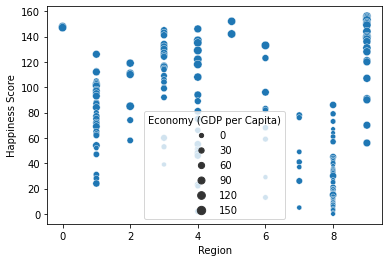

In [21]:
sns.scatterplot(x='Region',y='Happiness Score',size = df['Economy (GDP per Capita)'],data=df)

In [22]:
df.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,78.018987,77.981013,75.917722,78.500000,78.500000,78.430380,78.500000,78.392405,78.500000,78.500000
std,2.993321,45.321705,45.321705,43.888098,45.754781,45.754781,45.642807,45.754781,45.588695,45.754781,45.754781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000
50%,4.500000,78.500000,77.500000,76.000000,78.500000,78.500000,78.500000,78.500000,78.500000,78.500000,78.500000
75%,8.000000,116.750000,116.750000,112.750000,117.750000,117.750000,117.750000,117.750000,117.750000,117.750000,117.750000
max,9.000000,156.000000,156.000000,152.000000,157.000000,157.000000,156.000000,157.000000,156.000000,157.000000,157.000000


#### Checking for Outliers

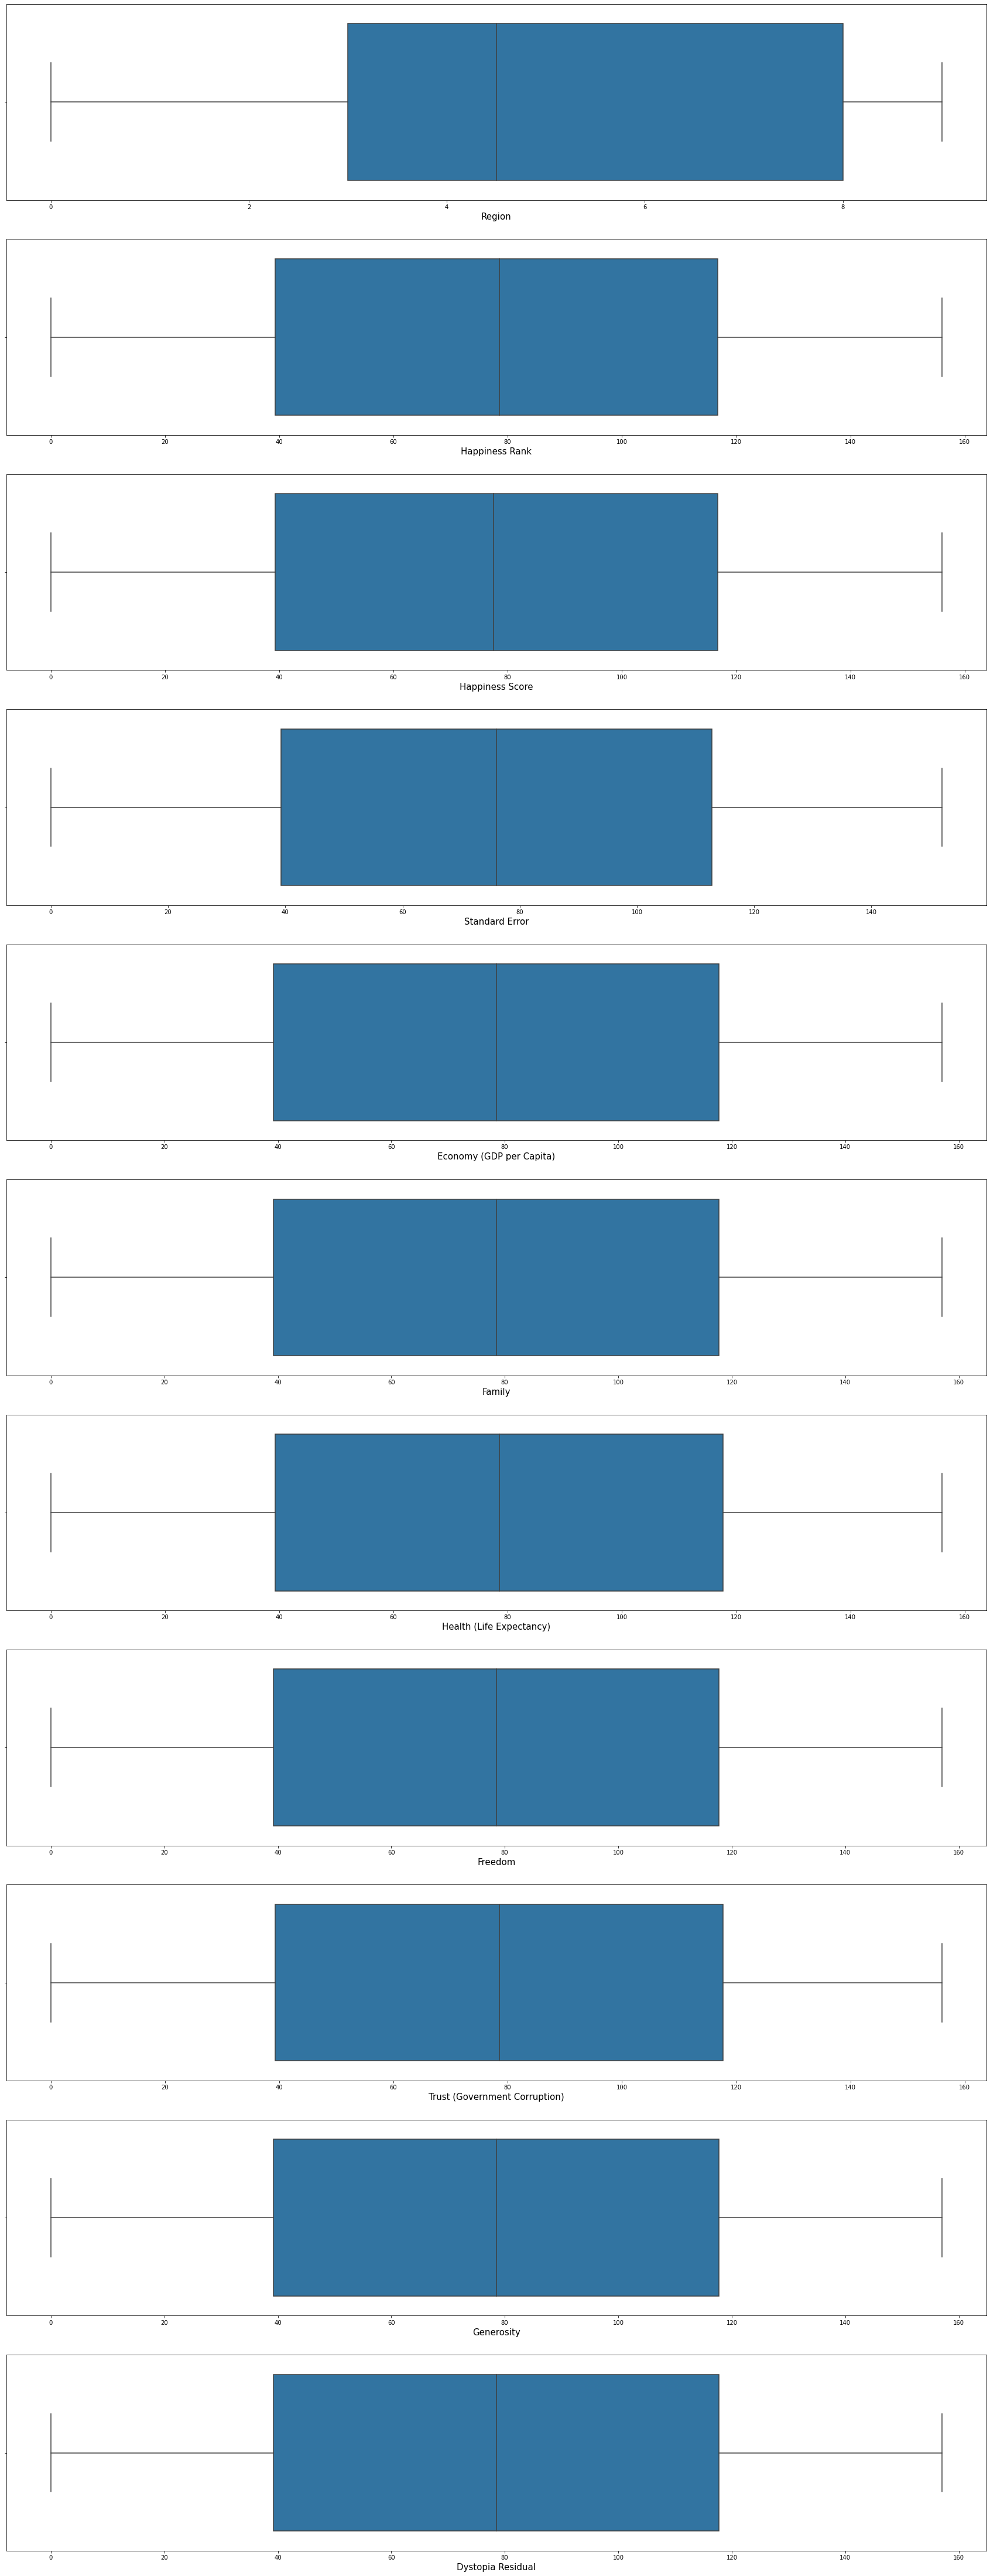

In [23]:
plt.figure(figsize=(30,80))
gr = 1
for column in df:
    if gr<=11:
        ax = plt.subplot(11,1,gr)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### Lets check the skewness too

In [24]:
df.skew()

Region                          -0.116119
Happiness Rank                  -0.001271
Happiness Score                  0.001271
Standard Error                   0.002827
Economy (GDP per Capita)         0.000000
Family                           0.000000
Health (Life Expectancy)        -0.007319
Freedom                          0.000000
Trust (Government Corruption)   -0.009927
Generosity                       0.000000
Dystopia Residual                0.000000
dtype: float64

#### No skewness is shown in the data

### Checking the Normal Distribution

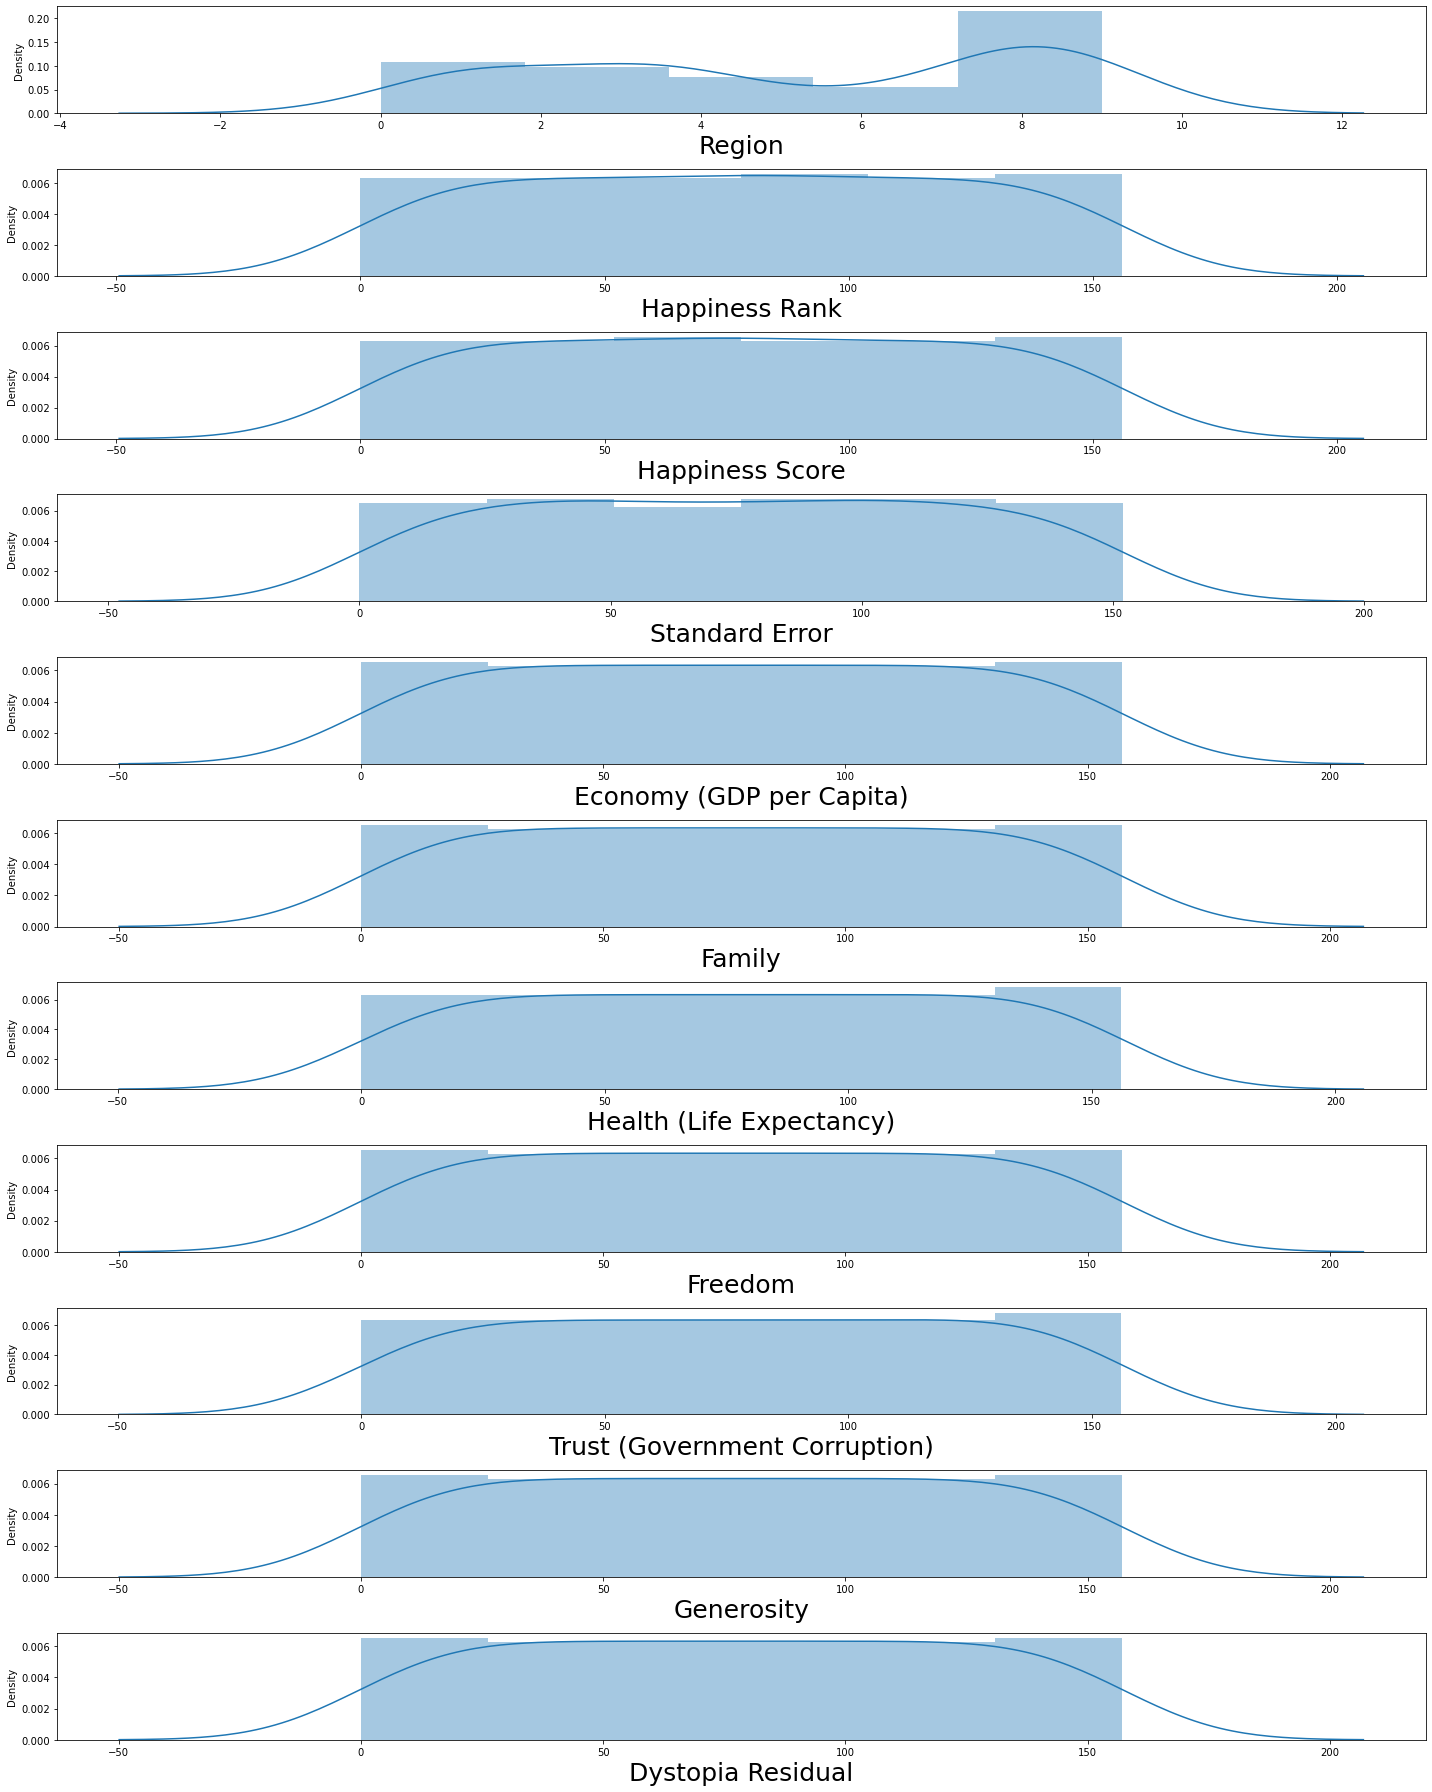

In [25]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=11:
        ax=plt.subplot(11,1,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### Everything seems to be under Normal Distribution

#### Data Cleaning

In [26]:
data_drop = pd.DataFrame([["0.18","Standard Error","No","0"],["0.18","Generosity","No","0"]],columns=["Correlation with target","Feature","Normalised","Skewness"])
data_drop

,Correlation with target,Feature,Normalised,Skewness
0,0.18,Standard Error,No,0
1,0.18,Generosity,No,0


#### Dropping Standard error and Generosity as they are less correlated with feature variable

In [27]:
df = df.drop(['Standard Error','Generosity'],axis=1)
df.head(3)

,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
Country,,,,,,,,,
135,9,0,156,151,154,148,156,150,125
58,9,1,155,136,157,150,143,98,134
37,9,2,154,139,155,128,151,153,122


#### Splitting the dataset into feature and target variable

In [28]:
x = df.drop(columns='Happiness Score')
y = df['Happiness Score']

#### Lets transform the data to remove skewness

In [29]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')
x

array([[ 1.24453048, -2.10048198,  1.4500372 , ...,  1.53546743,
         1.44059165,  0.99196295],
       [ 1.24453048, -2.03636098,  1.18876945, ...,  1.31165895,
         0.48889794,  1.1533319 ],
       [ 1.24453048, -1.98107561,  1.24165055, ...,  1.45003723,
         1.49237579,  0.93744982],
       ...,
       [-0.30300992,  1.52413952, -0.50452407, ..., -1.75529126,
         0.92382107, -2.09957803],
       [ 0.95510156,  1.54138831, -2.03504334, ..., -1.83798836,
        -0.01784029, -0.67101378],
       [ 0.95510156,  1.55860602, -1.60571218, ..., -0.52789734,
         0.10767278, -1.34371184]])

#### Now lets scale the data

In [30]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

#### Lets split the dataset into train and test

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 210)   

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Score in training dataset = ",lr.score(x_train,y_train))
print("Score in testing dataset = ",lr.score(x_test,y_test))
print("Model has been instantiated, trained and predicted")

Score in training dataset =  0.9922961217154636
Score in testing dataset =  0.9937909132455303
Model has been instantiated, trained and predicted


In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("MAE is : ",mean_absolute_error(y_test,y_pred))
print("MSE is :",mean_squared_error(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE is :  2.630495529214928
MSE is : 12.522113621209405
RMSE is : 3.5386598623220915


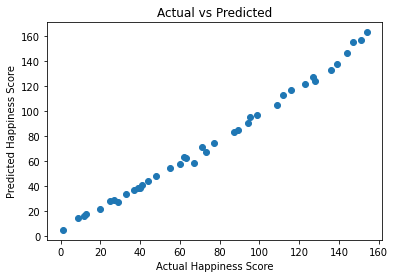

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual vs Predicted")
plt.show()

#### Lets check wheather the model is overfitted

In [35]:
from sklearn.linear_model import Lasso,LassoCV
lassocv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)
alpha = lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print("Score after Cross validation by L1 is ",lasso_reg.score(x_test,y_test))

Score after Cross validation by L1 is  0.9937812779299354


#### The cross validation score is exactly same as what we got before, so this implies that their is no overfitting

In [36]:
from sklearn.linear_model import Ridge,RidgeCV
ridgecv = RidgeCV(alphas=np.arange(0.0001,1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)
alpha = ridgecv.alpha_
ridge_reg = Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print("Score after Cross validation by L2 is ",ridge_reg.score(x_test,y_test))

Score after Cross validation by L2 is  0.993791030743078


#### Cross validated by both L1 and L2 technique and the score remains the same.

In [37]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
from sklearn.model_selection import GridSearchCV
params = {'random_state':[1,50],
         'max_depth':[2,10,2],
         'min_samples_leaf':[1,10,2],
         'min_samples_split':[2,12,2]}
grid = GridSearchCV(estimator = dt,param_grid = params,cv=10,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

Best Parameters are 
 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1}


In [38]:
dt = DecisionTreeRegressor(max_depth=10,min_samples_leaf=1,min_samples_split=2,random_state=1)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Score in training dataset is ",dt.score(x_train,y_train))
print("Score in testing dataset is ",dt.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_dt))
print("MSE is :",mean_squared_error(y_test,y_pred_dt))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_dt)))

Score in training dataset is  1.0
Score in testing dataset is  0.9964546743754773
MAE is :  2.25
MSE is : 7.15
RMSE is : 2.6739483914241875


In [39]:
from sklearn.metrics import r2_score
print("R2 score : ",r2_score(y_test,y_pred_dt))

R2 score :  0.9964546743754773


In [41]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(dt,x_scaled,y,cv=10,scoring='r2')
cvs = np.mean(cvs)
print("Cross validation score of Decision tree model is : ",cvs)

Cross validation score of Decision tree model is :  -1.7260914325889718


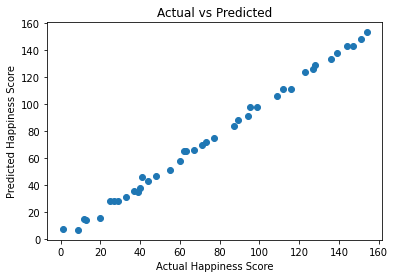

In [42]:
plt.scatter(y_test,y_pred_dt)
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual vs Predicted")
plt.show()

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
params = {'random_state':[1,50],
         'max_depth':[2,10,2],
         'min_samples_leaf':[1,10,2],
         'min_samples_split':[2,12,2]}
grid = GridSearchCV(estimator = rf,param_grid = params,cv=10,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

Best Parameters are 
 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 1}


In [44]:
rf = RandomForestRegressor(max_depth=10,min_samples_leaf=2,min_samples_split=2,random_state=1)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score in training dataset is ",rf.score(x_train,y_train))
print("Score in testing dataset is ",rf.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_rf))
print("MSE is :",mean_squared_error(y_test,y_pred_rf))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("R2 score : ",r2_score(y_test,y_pred_rf))

Score in training dataset is  0.9998166503276354
Score in testing dataset is  0.999364152426225
MAE is :  0.8761948593073587
MSE is : 1.2823392359350578
RMSE is : 1.132404183997506
R2 score :  0.999364152426225


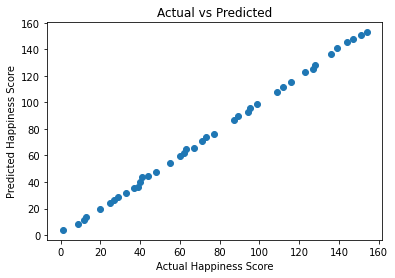

In [45]:
plt.scatter(y_test,y_pred_rf)
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual vs Predicted")
plt.show()

In [46]:
cvs = cross_val_score(rf,x_scaled,y,cv=10)
print("Cross validation score of Random forest model is : ",cvs.mean())

Cross validation score of Random forest model is :  -1.819072414609412


In [47]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
print("Score in training dataset is ",gbr.score(x_train,y_train))
print("Score in training dataset is ",gbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_gbr))
print("MSE is :",mean_squared_error(y_test,y_pred_gbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))
print("R2 score : ",r2_score(y_test,y_pred_gbr))

Score in training dataset is  0.9999978275369878
Score in training dataset is  0.999513137292315
MAE is :  0.9587127641360652
MSE is : 0.9818754970967746
RMSE is : 0.9908963099622354
R2 score :  0.999513137292315


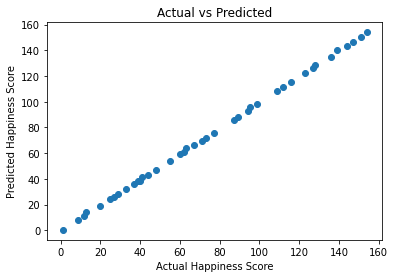

In [48]:
plt.scatter(y_test,y_pred_gbr)
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual vs Predicted")
plt.show()

In [49]:
cvs = cross_val_score(gbr,x_scaled,y,cv=10)
print("Cross validation score of GradientDescent Boosting model is : ",cvs.mean())

Cross validation score of GradientDescent Boosting model is :  -0.8612519088319772


In [50]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)
print("Score in training dataset is ",gbr.score(x_train,y_train))
print("Score in training dataset is ",gbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_svr))
print("MSE is :",mean_squared_error(y_test,y_pred_svr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_svr)))
print("R2 score : ",r2_score(y_test,y_pred_svr))

Score in training dataset is  0.9999978275369878
Score in training dataset is  0.999513137292315
MAE is :  27.59331024769787
MSE is : 1070.5687052554197
RMSE is : 32.71954622630668
R2 score :  0.4691587883141012


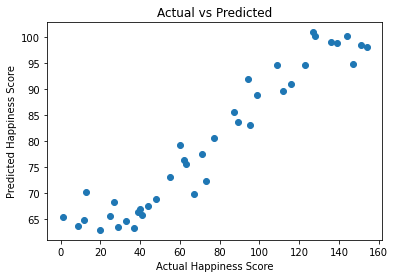

In [51]:
plt.scatter(y_test,y_pred_svr)
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual vs Predicted")
plt.show()

In [52]:
cvs = cross_val_score(svr,x_scaled,y,cv=10)
print("Cross validation score of SVR model is : ",np.abs(cvs.mean()))

Cross validation score of SVR model is :  70.96436825605062


In [53]:
models = pd.DataFrame([['Linear Regression',"99.3","99.3","Yes"],["DecisionTreeRegressor","99.6","172.6","No"],["RandomForestClassifier","99.9","181.9","No"],["GradientDescentBoosting","99.9","86.12","Yes"],["SVR","99.7","7096.4","No"]],columns=["Model","Testing Score","Cross Validation Score","Possibility"])
models

,Model,Testing Score,Cross Validation Score,Possibility
0,Linear Regression,99.3,99.3,Yes
1,DecisionTreeRegressor,99.6,172.6,No
2,RandomForestClassifier,99.9,181.9,No
3,GradientDescentBoosting,99.9,86.12,Yes
4,SVR,99.7,7096.4,No


##### Linear regression turns out to be the best model.

#### Model Saving

In [57]:
import pickle
filename = 'happiness_score.pkl'
pickle.dump(lr,open(filename,'wb'))